In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("data\\train.csv")

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Source: https://www.kaggle.com/competitions/spaceship-titanic/data


In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df_train.describe(include = ['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [6]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Things to do:
- handle null values
- check correlations
- create new features

### Home Planet

In [8]:
df_train["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

### Cryosleep

In [11]:
df_train["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

### Cabin

In [13]:
df_train["Cabin"].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [20]:
df_train[["Deck", "Num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

In [21]:
df_train["Deck"].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [22]:
df_train["Side"].value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [35]:
df_train["Num"].astype('Int64').value_counts().sort_index().head(10)

Num
0    18
1    15
2    11
3    16
4     7
5    13
6    12
7     9
8    13
9    16
Name: count, dtype: Int64

### Destination

In [36]:
df_train["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

### Age

In [37]:
df_train["Age"].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

### VIP

In [38]:
df_train["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [39]:
df_train[df_train["VIP"] == True]["Transported"].value_counts()

Transported
False    123
True      76
Name: count, dtype: int64

### Name

In [47]:
df_train["Name"].str.split(" ").str.len().sort_values()

0       2.0
5810    2.0
5809    2.0
5808    2.0
5807    2.0
       ... 
8629    NaN
8631    NaN
8636    NaN
8652    NaN
8664    NaN
Name: Name, Length: 8693, dtype: float64

### ID

In [66]:
df_train.drop(columns=["Ticket_no"], inplace=True)

In [67]:
df_train[["Group_no", "Passanger_no"]] = df_train["PassengerId"].str.split("_", expand=True).astype(int)

In [69]:
df_train["Expenses"] = df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["RoomService"] + df_train["VRDeck"]

In [70]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group_no,Passanger_no,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,9276,1,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,1,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,9279,1,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,9280,1,4637.0


## Correlations

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

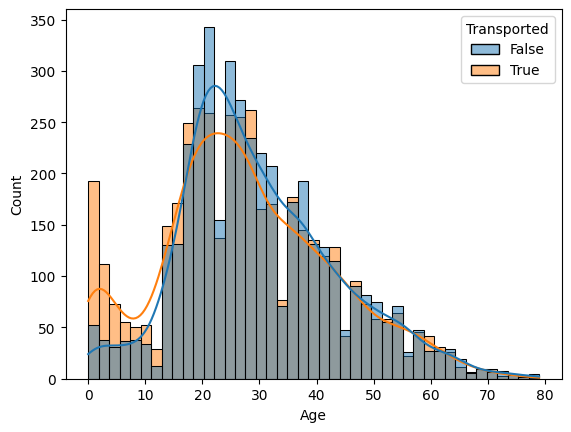

In [74]:
sns.histplot(data=df_train, x='Age', hue='Transported', kde=True)

<Axes: xlabel='Expenses', ylabel='Count'>

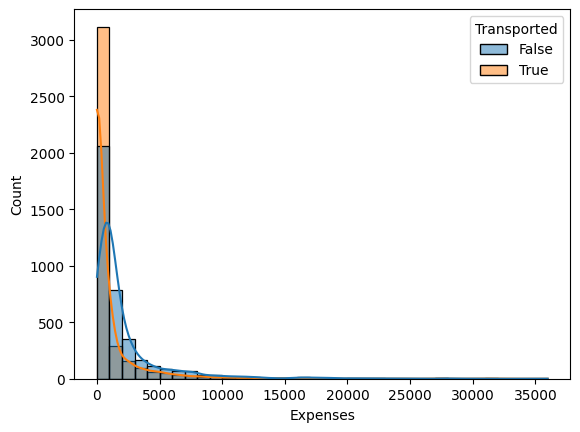

In [86]:
sns.histplot(data=df_train, x='Expenses', hue='Transported', kde=True, binwidth=1000)

In [91]:
df_train["Num"] = df_train["Num"].astype("Int64")

In [94]:
sns.histplot(data=df_train, x='Num', hue='Transported', kde=True)

TypeError: boolean value of NA is ambiguous

<Axes: xlabel='VIP', ylabel='count'>

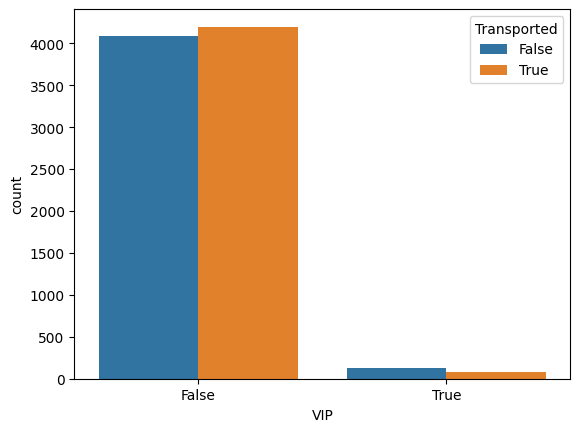

In [78]:
sns.countplot(data=df_train, x='VIP', hue='Transported')

<Axes: xlabel='HomePlanet', ylabel='count'>

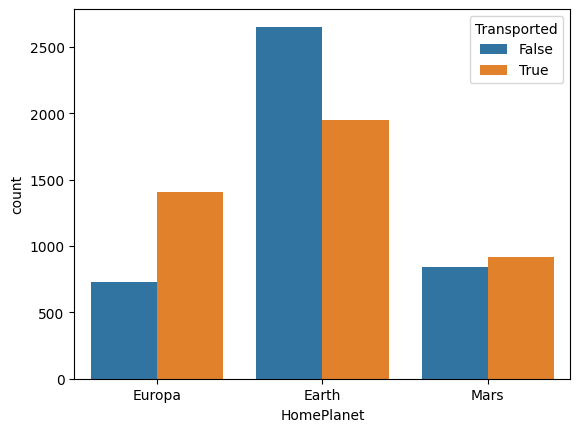

In [79]:
sns.countplot(data=df_train, x='HomePlanet', hue='Transported')

<Axes: xlabel='CryoSleep', ylabel='count'>

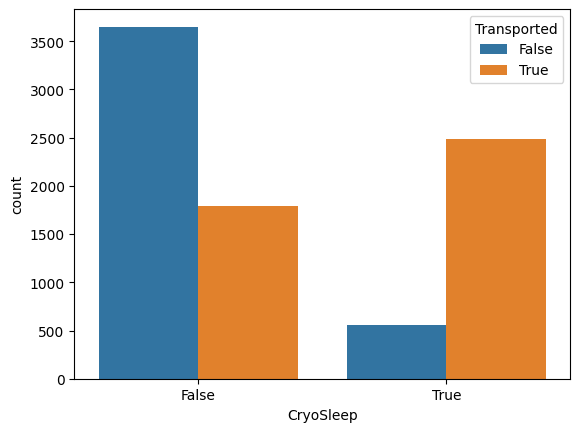

In [80]:
sns.countplot(data=df_train, x='CryoSleep', hue='Transported')

<Axes: xlabel='Destination', ylabel='count'>

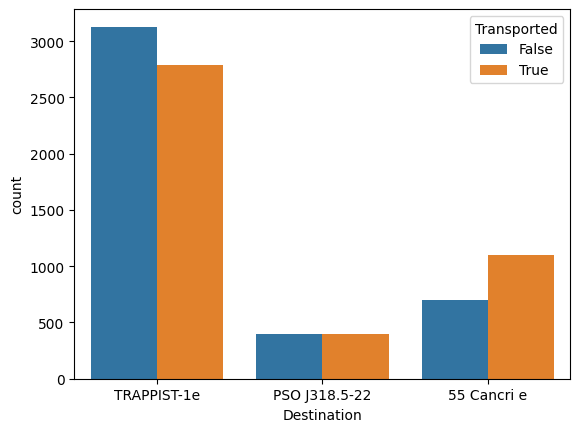

In [81]:
sns.countplot(data=df_train, x='Destination', hue='Transported')

<Axes: xlabel='Deck', ylabel='count'>

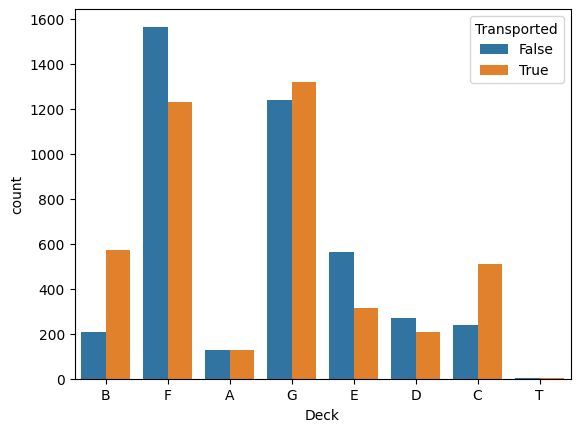

In [82]:
sns.countplot(data=df_train, x='Deck', hue='Transported')

<Axes: xlabel='Side', ylabel='count'>

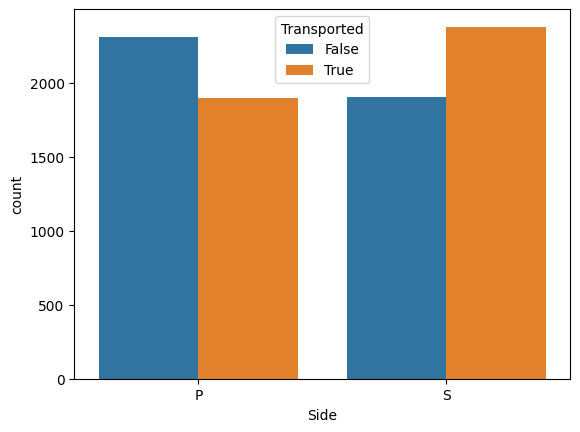

In [83]:
sns.countplot(data=df_train, x='Side', hue='Transported')

In [ ]:
sns.countplot(data=df_train, x='Side', hue='Transported')